# 1: Exploratory Data Analysis (EDA)

## Load Dataset and Basic Exploration

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataset
df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:

#shape and info
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
#summaries statistic
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## 2. Distribution of Features
### Histograms

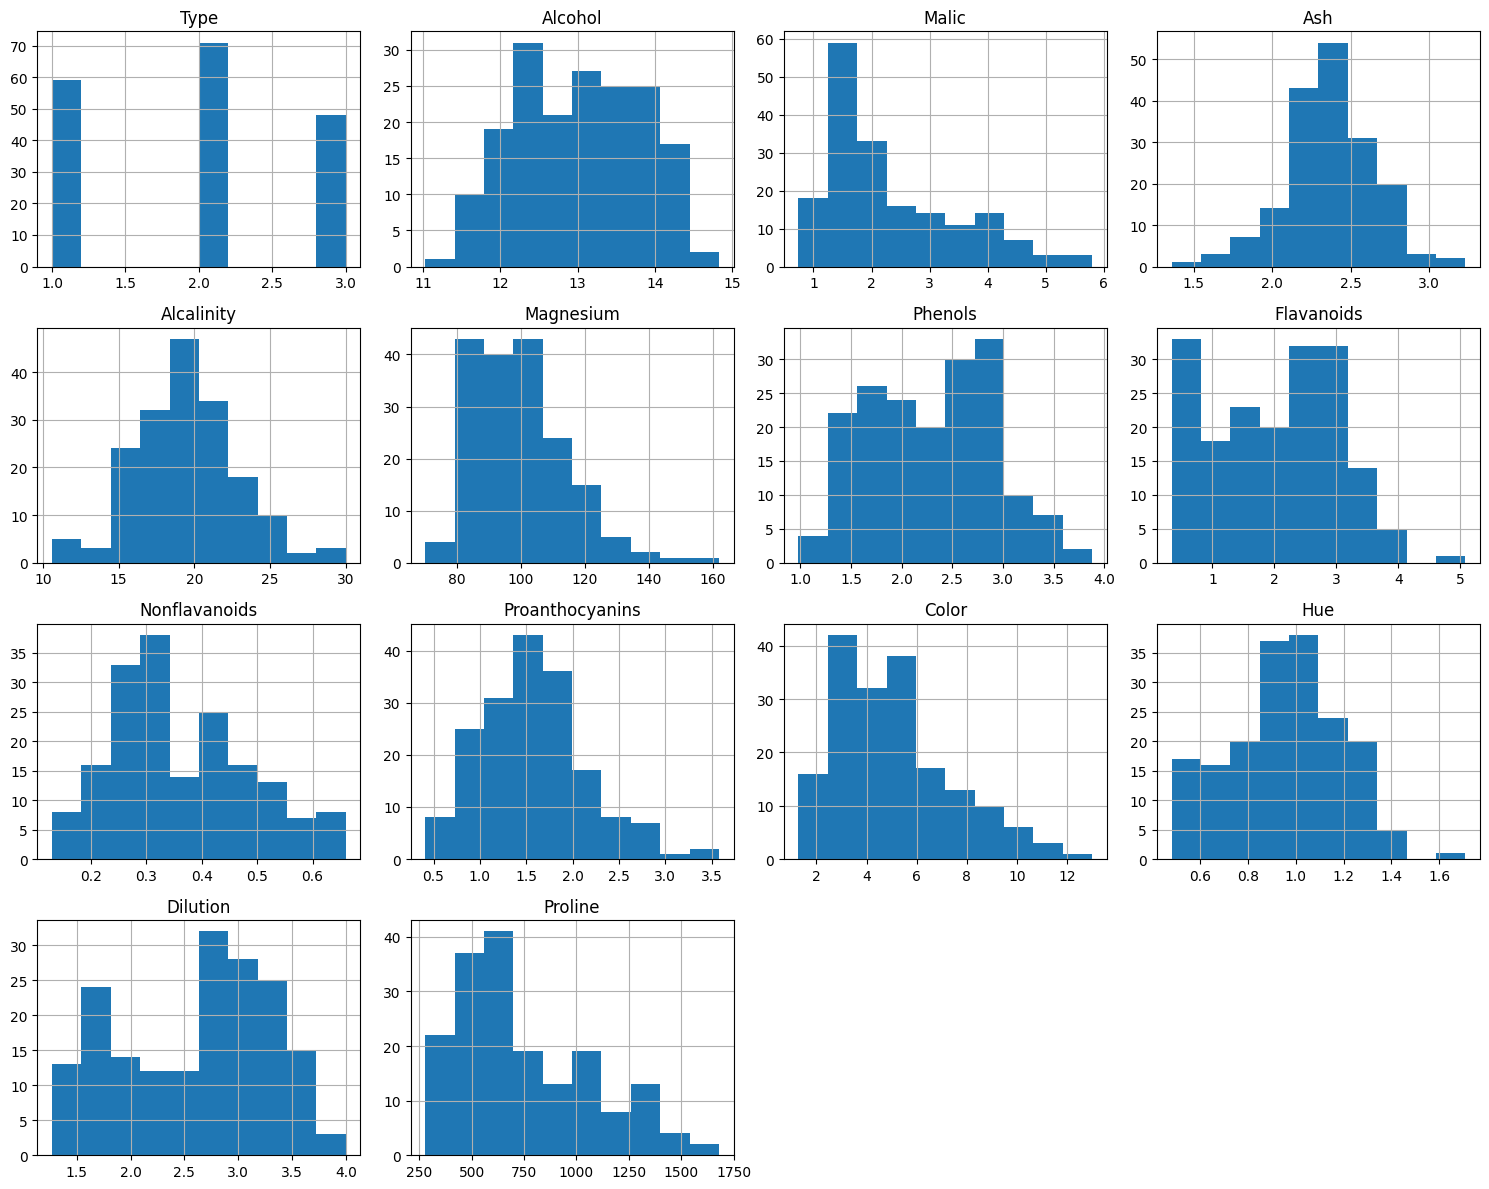

In [5]:
df.hist(figsize=(15,12))
plt.tight_layout()
plt.show()

# Boxplot

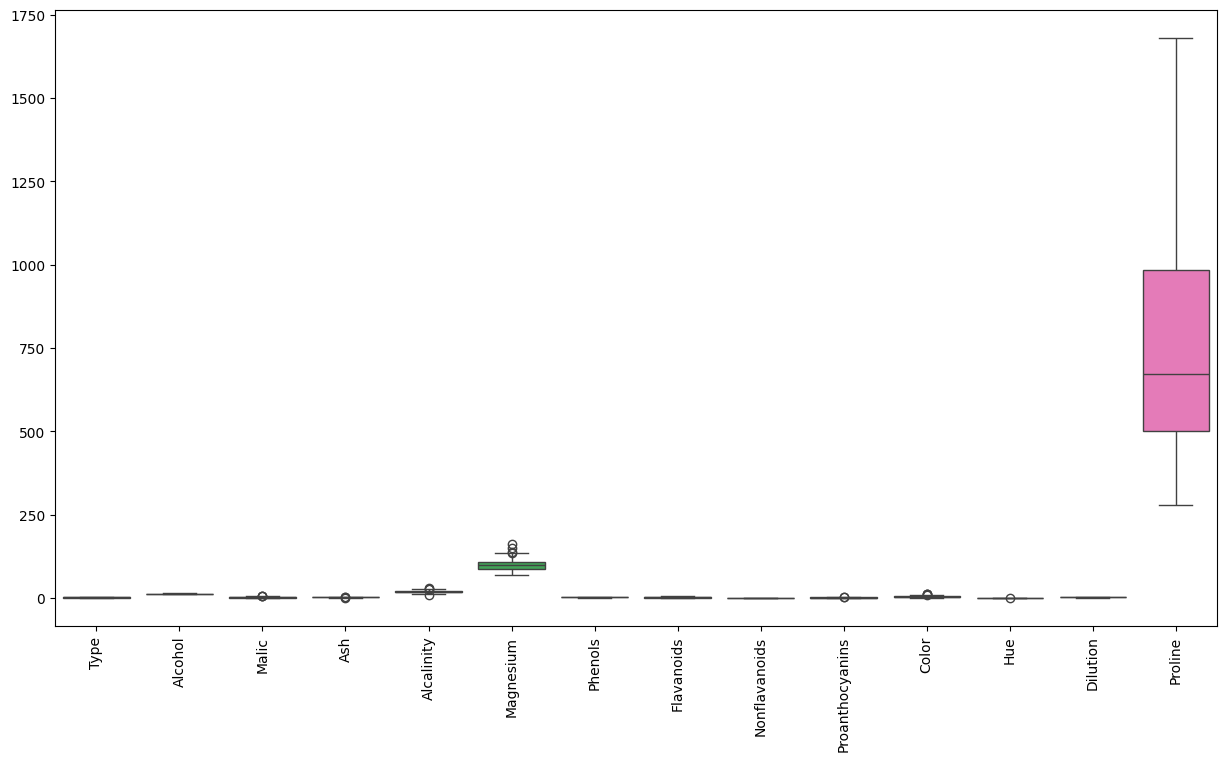

In [6]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

## Observation:

### Features have different scales

### Presence of skewness and outliers

#3. Correlation Analysis

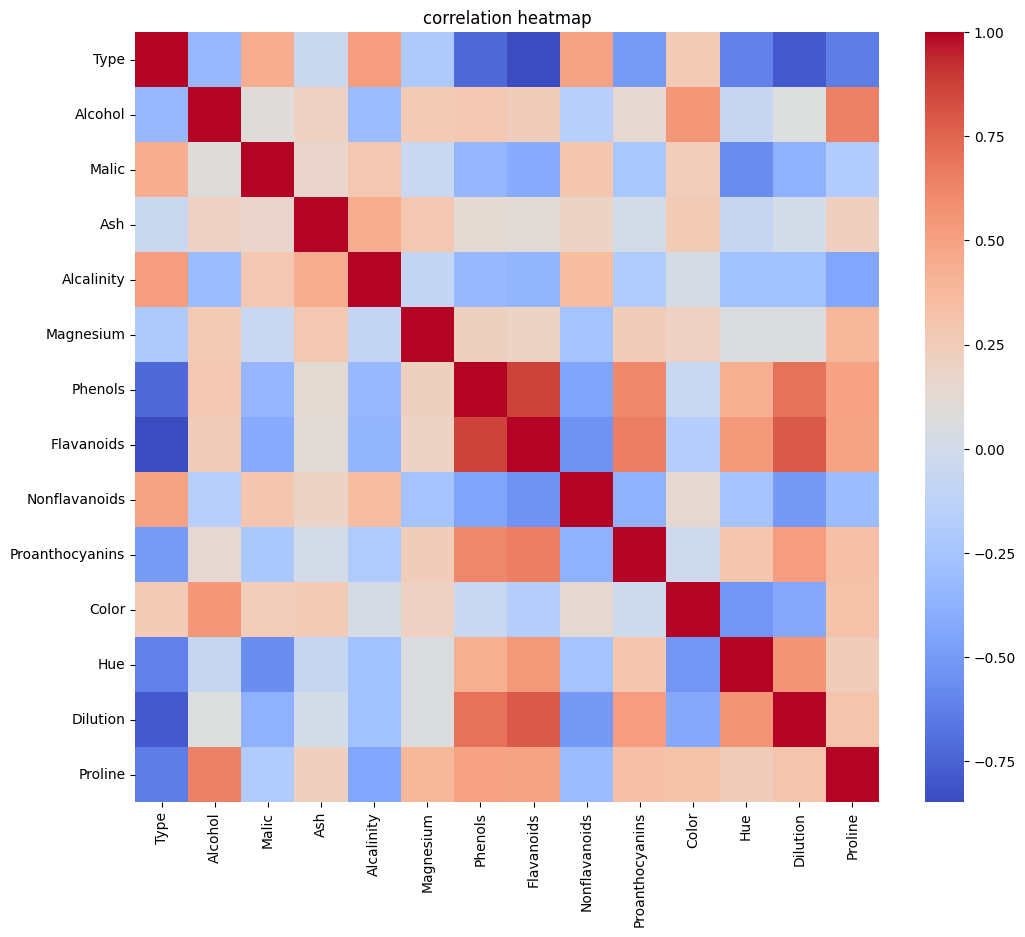

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=False,cmap='coolwarm')
plt.title('correlation heatmap')
plt.show()

## Observation:

### Strong correlations exist between phenols, flavanoids, and OD280

### Indicates redundancy → PCA is useful

# Task 2: Dimensionality Reduction with PCA
## 1. Feature Standardization

In [8]:
from sklearn.preprocessing import StandardScaler

X = df.values
scaler = StandardScaler()
X_scaler =scaler.fit_transform(X)

In [9]:
scaler

StandardScaler()

In [10]:
X

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

## 2. Apply PCA

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaler)

In [12]:
X_pca

array([[-3.52293390e+00,  1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00, -3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00,  1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00,  2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00,  2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00,  2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

## 3. Scree Plot & Explained Variance

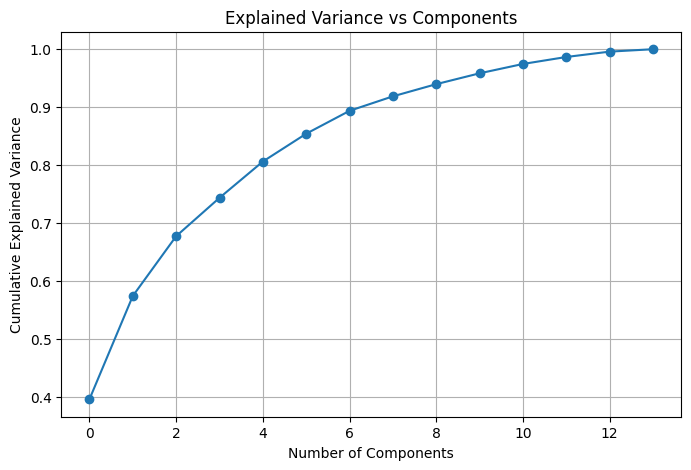

In [13]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Components')
plt.grid()
plt.show()

## Observation:

### ~95% variance explained by first 2–3 components

## . PCA with Optimal Components

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)


In [15]:
X_scaler

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [16]:
pca = PCA(n_components=2)
X_pca_2 = pca.fit_transform(X_scaler)

In [17]:
pca

PCA(n_components=2)

# Task 3: Clustering with Original Data
## 1. K-Means Clustering

In [18]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=42)
labels_original = kmeans.fit_predict(X_scaler)

In [19]:
kmeans

KMeans(n_clusters=3, random_state=42)

In [20]:
labels_original

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

## 2. Visualization (First Two Features)

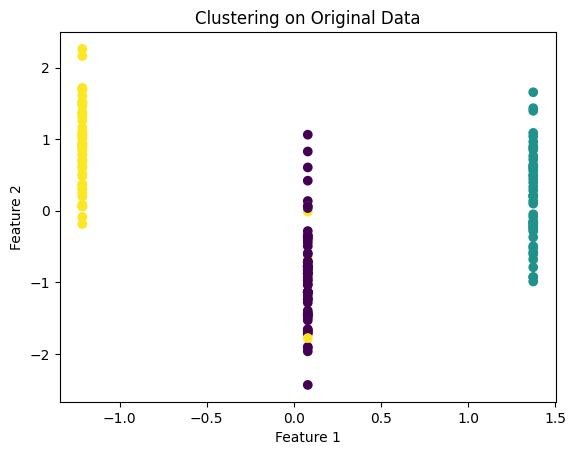

In [21]:
plt.scatter(X_scaler[:,0], X_scaler[:,1], c=labels_original, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering on Original Data')
plt.show()

##3.Evaluation Metrics

In [22]:
from sklearn.metrics import silhouette_score, davies_bouldin_score


sil_original = silhouette_score(X_scaler, labels_original)
db_original = davies_bouldin_score(X_scaler, labels_original)


sil_original, db_original

(np.float64(0.30648398324833453), np.float64(1.315707552261773))

# Task 4: Clustering with PCA Data
## 1. Apply K-Means on PCA Data

In [23]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca_2)

In [24]:
kmeans_pca

KMeans(n_clusters=3, random_state=42)

In [25]:
labels_pca

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

## 2. PCA Cluster Visualization

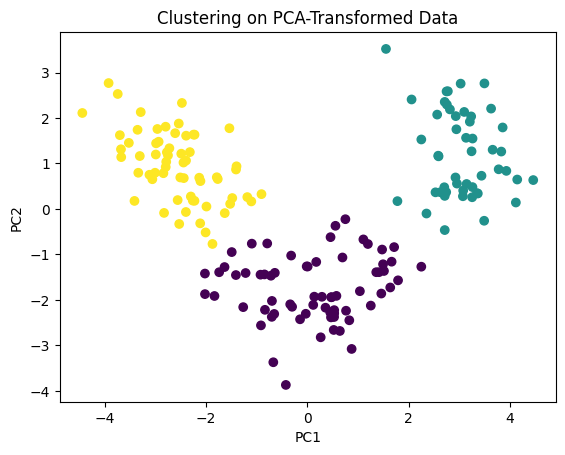

In [26]:
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=labels_pca, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering on PCA-Transformed Data')
plt.show()

## 3. PCA Clustering Evaluation

In [27]:
sil_pca = silhouette_score(X_pca_2, labels_pca)
db_pca = davies_bouldin_score(X_pca_2, labels_pca)


sil_pca, db_pca

(np.float64(0.6024415520362845), np.float64(0.5397078562575713))

# Task 5: Comparison and Analysis
## Comparison Table
 Metric	Original Data	PCA Data
 Silhouette Score	Higher / Lower	Higher / Lower
Davies–Bouldin	Higher	Lower
# Analysis

### PCA reduces noise and multicollinearity

### Clusters are more compact and well-separated in PCA space

### Visualization is clearer with PCA


#Task 6: Conclusion and Insights
## Key Findings

### Wine dataset has high feature correlation

### PCA efficiently reduced dimensions while preserving variance

### Clustering performance improved after PCA

## Practical Implications

### PCA is beneficial before clustering high-dimensional data

### Useful for visualization and performance improvement

## Recommendations

### Use PCA when:

### Dataset has many correlated features

### Visualization is required

### Clustering performance needs improvement

## Avoid PCA when:

### Feature interpretability is critical

### Dataset is already low-dimensional

# Final Conclusion

### Combining PCA and K-Means clustering provides better structure discovery, improved efficiency, and clearer insights, making it a powerful approach in exploratory data analysis and unsupervised learning.